In [237]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import re

In [238]:
#Making Years Format easy
data=pd.read_csv("data/worldbank_India_1960-2020.csv")
data.drop(columns=["Country Code","Series Code","Country Name"],axis=1,inplace=True)
for column in data.columns:
    year_match = re.search(r"\d{4}", column)
    if year_match:
        year = year_match.group()
        data.rename(columns={column: year}, inplace=True)
data.set_index("Series Name",inplace=True)

In [239]:
data=data.replace("..",np.nan)
refined_data=data[:-5] # Delete unnecessary last 5 rows as they were useless for our calculation
refined_data=refined_data.astype(np.float32)
refined_data=refined_data.T.copy()
refined_data=refined_data.applymap(lambda x: f'{x:.4f}')
refined_data=refined_data.rename_axis("Year")
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
refined_data

Series Name,"Population, total",Population growth (annual %),Surface area (sq. km),Population density (people per sq. km of land area),Poverty headcount ratio at national poverty lines (% of population),Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population),"GNI, Atlas method (current US$)","GNI per capita, Atlas method (current US$)","GNI, PPP (current international $)","GNI per capita, PPP (current international $)",Income share held by lowest 20%,"Life expectancy at birth, total (years)","Fertility rate, total (births per woman)","Adolescent fertility rate (births per 1,000 women ages 15-19)","Contraceptive prevalence, any method (% of married women ages 15-49)",Births attended by skilled health staff (% of total),"Mortality rate, under-5 (per 1,000 live births)","Prevalence of underweight, weight for age (% of children under 5)","Immunization, measles (% of children ages 12-23 months)","Primary completion rate, total (% of relevant age group)","School enrollment, primary (% gross)","School enrollment, secondary (% gross)","School enrollment, primary and secondary (gross), gender parity index (GPI)","Prevalence of HIV, total (% of population ages 15-49)",Forest area (sq. km),Terrestrial and marine protected areas (% of total territorial area),"Annual freshwater withdrawals, total (% of internal resources)",Urban population growth (annual %),Energy use (kg of oil equivalent per capita),CO2 emissions (metric tons per capita),Electric power consumption (kWh per capita),GDP (current US$),GDP growth (annual %),"Inflation, GDP deflator (annual %)","Agriculture, forestry, and fishing, value added (% of GDP)","Industry (including construction), value added (% of GDP)",Exports of goods and services (% of GDP),Imports of goods and services (% of GDP),Gross capital formation (% of GDP),"Revenue, excluding grants (% of GDP)",Time required to start a business (days),Domestic credit provided by financial sector (% of GDP),Tax revenue (% of GDP),Military expenditure (% of GDP),Mobile cellular subscriptions (per 100 people),High-technology exports (% of manufactured exports),Statistical Capacity Score (Overall Average) (scale 0 - 100),Merchandise trade (% of GDP),Net barter terms of trade index (2015 = 100),"External debt stocks, total (DOD, current US$)","Total debt service (% of exports of goods, services and primary income)",Net migration,"Personal remittances, received (current US$)","Foreign direct investment, net inflows (BoP, current US$)",Net official development assistance and official aid received (current US$)
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1960,445954592.0000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,45.2180,5.9210,148.4170,nan,nan,242.8000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,37029883904.0000,nan,nan,41.7413,20.8343,4.4632,6.8337,17.9313,nan,nan,nan,nan,2.0040,0.0000,nan,nan,9.8164,nan,nan,nan,52264.0000,nan,nan,729630016.0000
1961,456351872.0000,2.3047,3287260.0000,153.4890,nan,nan,nan,nan,nan,nan,nan,45.3980,5.9370,149.3850,nan,nan,239.3000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,2.9054,nan,nan,nan,39232434176.0000,3.7227,2.1454,41.0925,21.4348,4.3036,5.9576,19.2621,nan,nan,nan,nan,2.0744,nan,nan,nan,9.3596,nan,nan,nan,114181.0000,nan,nan,616590016.0000
1962,467024192.0000,2.3117,3287260.0000,157.0785,nan,nan,41173872640.0000,90.0000,nan,nan,nan,45.6590,5.9530,149.2090,nan,nan,236.1000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,3.3379,nan,nan,nan,42161483776.0000,2.9311,4.4056,39.0660,22.0526,4.1690,6.0318,18.1076,nan,nan,nan,nan,2.7454,nan,nan,nan,8.9300,nan,nan,nan,110398.0000,nan,nan,677270016.0000
1963,477933632.0000,2.3091,3287260.0000,160.7478,nan,nan,45729181696.0000,100.0000,nan,nan,nan,45.9360,5.9690,148.5520,nan,nan,233.2000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,3.3303,nan,nan,nan,48421924864.0000,5.9944,8.3536,39.8254,21.8795,4.2805,5.9068,18.9955,nan,nan,nan,nan,4.0253,nan,nan,nan,8.4734,nan,nan,nan,48986.0000,nan,nan,977440000.0000
1964,489059296.0000,2.3

# DATA PREPROCESSING

In [240]:
rd1=refined_data.copy()

In [241]:
#Finding the nan values and converting data to correct data type
rd1.replace("..",np.nan,inplace=True)
rd1=rd1.apply(pd.to_numeric, errors='coerce')
pd.set_option('display.float_format', lambda x: '%.3f' % x)
rd1

Series Name,"Population, total",Population growth (annual %),Surface area (sq. km),Population density (people per sq. km of land area),Poverty headcount ratio at national poverty lines (% of population),Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population),"GNI, Atlas method (current US$)","GNI per capita, Atlas method (current US$)","GNI, PPP (current international $)","GNI per capita, PPP (current international $)",Income share held by lowest 20%,"Life expectancy at birth, total (years)","Fertility rate, total (births per woman)","Adolescent fertility rate (births per 1,000 women ages 15-19)","Contraceptive prevalence, any method (% of married women ages 15-49)",Births attended by skilled health staff (% of total),"Mortality rate, under-5 (per 1,000 live births)","Prevalence of underweight, weight for age (% of children under 5)","Immunization, measles (% of children ages 12-23 months)","Primary completion rate, total (% of relevant age group)","School enrollment, primary (% gross)","School enrollment, secondary (% gross)","School enrollment, primary and secondary (gross), gender parity index (GPI)","Prevalence of HIV, total (% of population ages 15-49)",Forest area (sq. km),Terrestrial and marine protected areas (% of total territorial area),"Annual freshwater withdrawals, total (% of internal resources)",Urban population growth (annual %),Energy use (kg of oil equivalent per capita),CO2 emissions (metric tons per capita),Electric power consumption (kWh per capita),GDP (current US$),GDP growth (annual %),"Inflation, GDP deflator (annual %)","Agriculture, forestry, and fishing, value added (% of GDP)","Industry (including construction), value added (% of GDP)",Exports of goods and services (% of GDP),Imports of goods and services (% of GDP),Gross capital formation (% of GDP),"Revenue, excluding grants (% of GDP)",Time required to start a business (days),Domestic credit provided by financial sector (% of GDP),Tax revenue (% of GDP),Military expenditure (% of GDP),Mobile cellular subscriptions (per 100 people),High-technology exports (% of manufactured exports),Statistical Capacity Score (Overall Average) (scale 0 - 100),Merchandise trade (% of GDP),Net barter terms of trade index (2015 = 100),"External debt stocks, total (DOD, current US$)","Total debt service (% of exports of goods, services and primary income)",Net migration,"Personal remittances, received (current US$)","Foreign direct investment, net inflows (BoP, current US$)",Net official development assistance and official aid received (current US$)
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1960,445954592.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.218,5.921,148.417,NaN,NaN,242.800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37029883904.000,NaN,NaN,41.741,20.834,4.463,6.834,17.931,NaN,NaN,NaN,NaN,2.004,0.000,NaN,NaN,9.816,NaN,NaN,NaN,52264.000,NaN,NaN,729630016.000
1961,456351872.000,2.305,3287260.000,153.489,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.398,5.937,149.385,NaN,NaN,239.300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.905,NaN,NaN,NaN,39232434176.000,3.723,2.145,41.093,21.435,4.304,5.958,19.262,NaN,NaN,NaN,NaN,2.074,NaN,NaN,NaN,9.360,NaN,NaN,NaN,114181.000,NaN,NaN,616590016.000
1962,467024192.000,2.312,3287260.000,157.078,NaN,NaN,41173872640.000,90.000,NaN,NaN,NaN,45.659,5.953,149.209,NaN,NaN,236.100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.338,NaN,NaN,NaN,42161483776.000,2.931,4.406,39.066,22.053,4.169,6.032,18.108,NaN,NaN,NaN,NaN,2.745,NaN,NaN,NaN,8.930,NaN,NaN,NaN,110398.000,NaN,NaN,677270016.000
1963,477933632.000,2.309,3287260.000,160.748,NaN,NaN,45729181696.000,100.000,NaN,NaN,NaN,45.936,5.969,148.552,NaN,NaN,233.200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.330,NaN,NaN,NaN,48421924864.000,5.994,8.354,39.825,21.880,4.280,5.907,18.995,NaN,NaN,NaN,NaN,4.025,NaN,NaN,NaN,8.473,NaN,NaN,NaN,48986.000,NaN,NaN,977440000.000
1964,489059296.000,2.301,3287260.000,164.490,NaN,NaN,52536803328.000,110.000,NaN,NaN,NaN,46.184,5.979,148.

In [242]:
import pandas as pd

#Keeping only the necessary columns from the dataset and deleting the rest
necessary_columns = [
    'Population, total',
    'Urban population growth (annual %)', 'GDP (current US$)', 'GDP growth (annual %)',
    'Inflation, GDP deflator (annual %)', 'Agriculture, forestry, and fishing, value added (% of GDP)',
    'Industry (including construction), value added (% of GDP)',
    'Exports of goods and services (% of GDP)', 'Imports of goods and services (% of GDP)',
    'Gross capital formation (% of GDP)', 'Revenue, excluding grants (% of GDP)',
    'Tax revenue (% of GDP)', 'Military expenditure (% of GDP)', 'Merchandise trade (% of GDP)',
    'External debt stocks, total (DOD, current US$)', 'Net barter terms of trade index (2015 = 100)', 'Foreign direct investment, net inflows (BoP, current US$)'
]

gdp = rd1[necessary_columns]
gdp

Series Name,"Population, total",Urban population growth (annual %),GDP (current US$),GDP growth (annual %),"Inflation, GDP deflator (annual %)","Agriculture, forestry, and fishing, value added (% of GDP)","Industry (including construction), value added (% of GDP)",Exports of goods and services (% of GDP),Imports of goods and services (% of GDP),Gross capital formation (% of GDP),"Revenue, excluding grants (% of GDP)",Tax revenue (% of GDP),Military expenditure (% of GDP),Merchandise trade (% of GDP),"External debt stocks, total (DOD, current US$)",Net barter terms of trade index (2015 = 100),"Foreign direct investment, net inflows (BoP, current US$)"
Year,,,,,,,,,,,,,,,,,
1960,445954592.000,NaN,37029883904.000,NaN,NaN,41.741,20.834,4.463,6.834,17.931,NaN,NaN,2.004,9.816,NaN,NaN,NaN
1961,456351872.000,2.905,39232434176.000,3.723,2.145,41.093,21.435,4.304,5.958,19.262,NaN,NaN,2.074,9.360,NaN,NaN,NaN
1962,467024192.000,3.338,42161483776.000,2.931,4.406,39.066,22.053,4.169,6.032,18.108,NaN,NaN,2.745,8.930,NaN,NaN,NaN
1963,477933632.000,3.330,48421924864.000,5.994,8.354,39.825,21.880,4.280,5.907,18.995,NaN,NaN,4.025,8.473,NaN,NaN,NaN
1964,489059296.000,3.328,56480288768.000,7.453,8.552,41.344,20.955,3.726,5.685,19.530,NaN,NaN,3.819,8.111,NaN,NaN,NaN
1965,500114336.000,3.252,59554852864.000,-2.636,8.300,39.385,21.655,3.308,5.212,20.057,NaN,NaN,3.871,7.598,NaN,NaN,NaN
1966,510992608.000,3.169,45865463808.000,-0.055,13.271,40.352,21.387,4.143,6.672,18.358,NaN,NaN,3.572,11.761,NaN,NaN,NaN
1967,521987072.000,3.146,50134941696.000,7.826,8.616,42.752,20.089,4.034,5.947,18.198,NaN,NaN,3.224,8.748,NaN,NaN,NaN
1968,533431904.000,3.181,53085454336.000,3.388,2.415,42.086,20.627,4.039,4.943,17.742,NaN,NaN,3.246,8.159,NaN,NaN,NaN


In [243]:
missing_values = gdp.isnull().sum()
print("Missing Values or Nulls:\n", missing_values)

Missing Values or Nulls:
 Series Name
Population, total                                              0
Urban population growth (annual %)                             1
GDP (current US$)                                              0
GDP growth (annual %)                                          1
Inflation, GDP deflator (annual %)                             1
Agriculture, forestry, and fishing, value added (% of GDP)     0
Industry (including construction), value added (% of GDP)      0
Exports of goods and services (% of GDP)                       0
Imports of goods and services (% of GDP)                       0
Gross capital formation (% of GDP)                             0
Revenue, excluding grants (% of GDP)                          18
Tax revenue (% of GDP)                                        18
Military expenditure (% of GDP)                                0
Merchandise trade (% of GDP)                                   0
External debt stocks, total (DOD, current US$)      

In [244]:
attributes_description = gdp.describe()
print("Attributes Description:\n", attributes_description)

Attributes Description:
 Series Name  Population, total  Urban population growth (annual %)  \
count                   63.000                              62.000   
mean             907933404.952                               2.984   
std              306757727.771                               0.496   
min              445954592.000                               2.025   
25%              630487840.000                               2.599   
50%              888941760.000                               2.922   
75%             1181032768.000                               3.238   
max             1417173120.000                               3.881   

Series Name  GDP (current US$)  GDP growth (annual %)  \
count                   63.000                 62.000   
mean          741431449437.460                  5.136   
std           923682620231.784                  3.221   
min            37029883904.000                 -5.831   
25%           101121531904.000                  3.808   
50

**HISTOGRAMS**

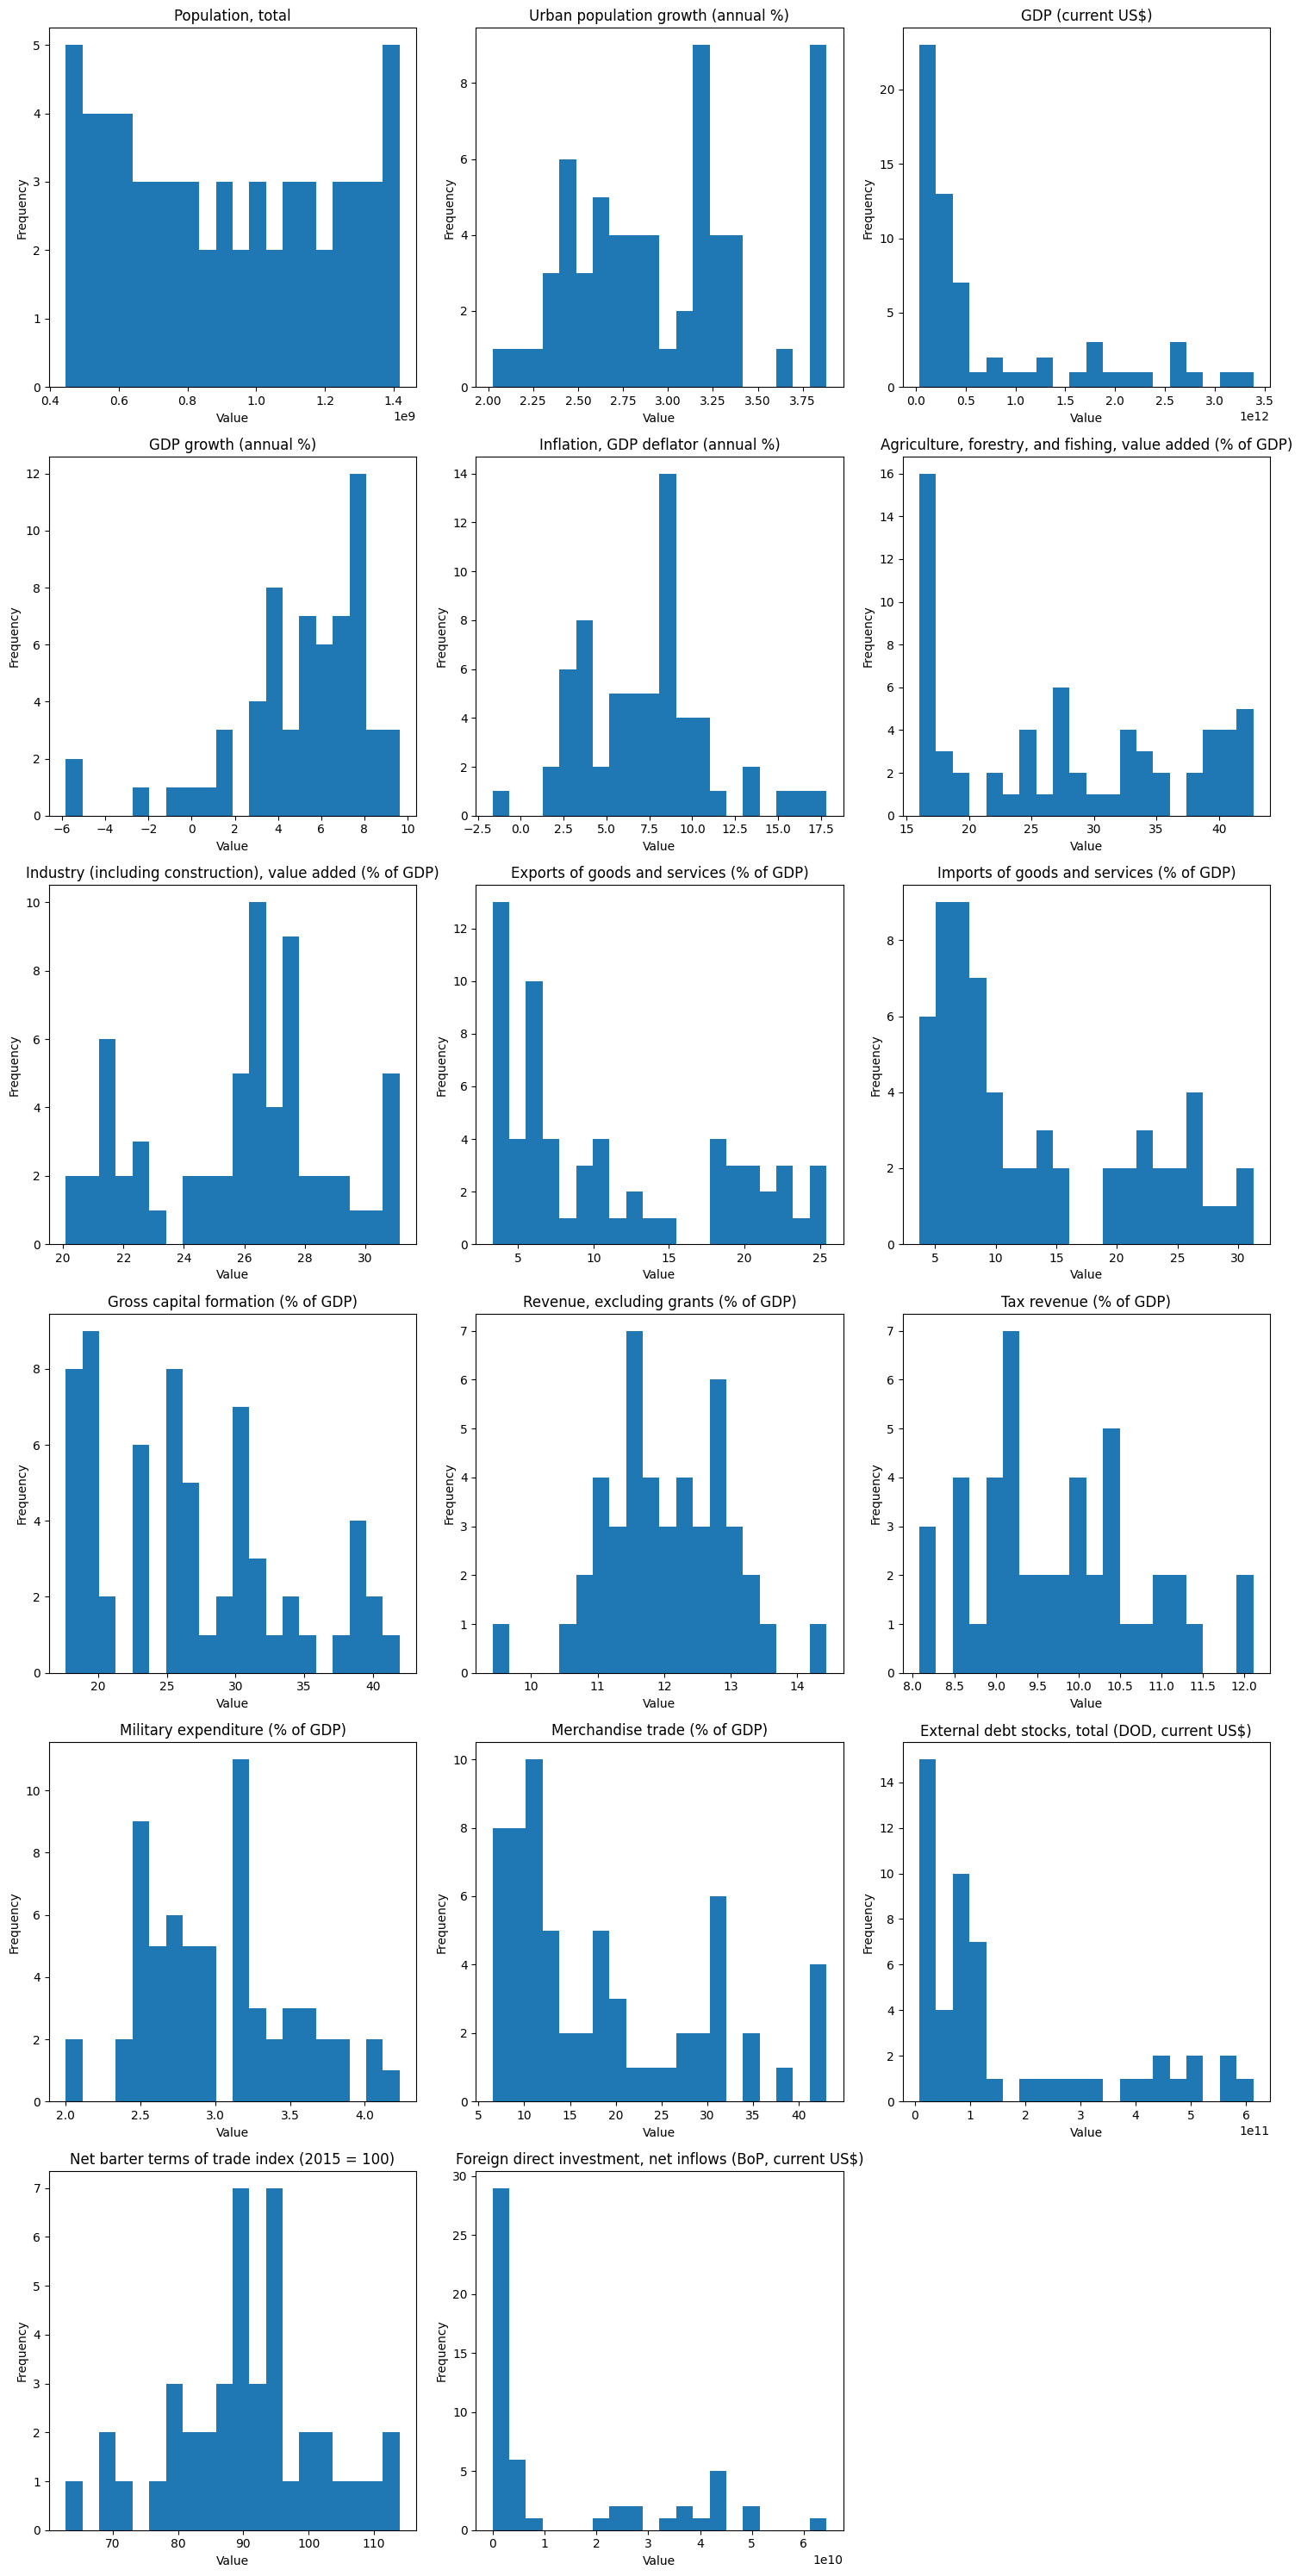

In [245]:
import matplotlib.pyplot as plt
num_rows = (len(gdp.columns) + 2) // 3
fig, axs = plt.subplots(num_rows, 3, figsize=(15, num_rows * 5))
axs = axs.flatten()

for i, column in enumerate(gdp.columns):
    ax = axs[i]
    ax.hist(gdp[column], bins=20)
    ax.set_title(column)
    ax.set_xlabel("Value")
    ax.set_ylabel("Frequency")

for j in range(len(gdp.columns), num_rows * 3):
    axs[j].axis('off')

plt.tight_layout()
plt.show()

**BOXPLOTS**

C:\Users\pvpra\AppData\Local\Temp\ipykernel_22308\2576476545.py:21: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


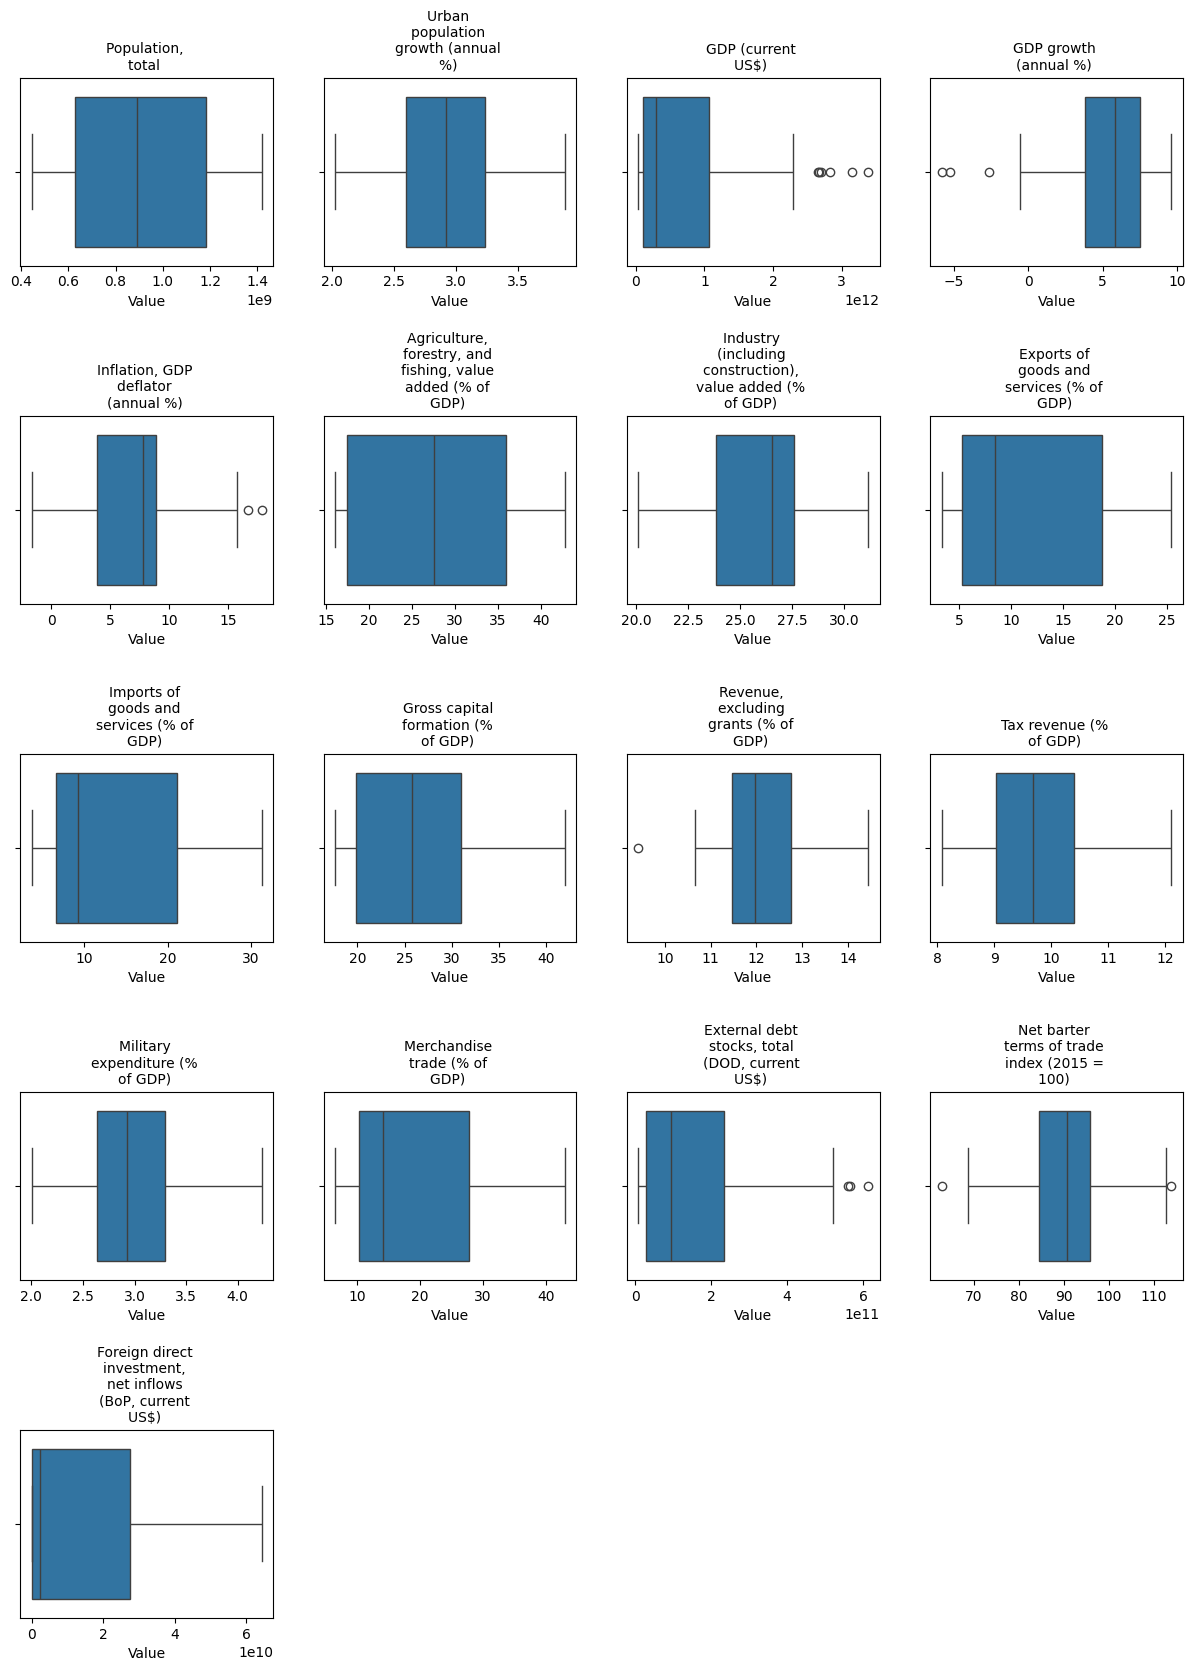

In [246]:
import seaborn as sns
num_rows = (len(gdp.columns) + 3) // 4
fig, axs = plt.subplots(num_rows, 4, figsize=(15, num_rows * 4), gridspec_kw={'hspace': 0.8})
axs = axs.flatten()

for i, column in enumerate(gdp.columns):
    ax = axs[i]
    words = column.split()
    title_lines = ['']
    for word in words:
        if len(title_lines[-1]) + len(word) + 1 > 15:
            title_lines.append('')
        title_lines[-1] += word + ' '
    sns.boxplot(x=gdp[column], ax=ax)
    ax.set_title('\n'.join(title_lines), fontsize=10)
    ax.set_xlabel("Value")

for j in range(len(gdp.columns), num_rows * 4):
    axs[j].axis('off')

plt.tight_layout()
plt.show()


In [247]:
#dropping columns with all null values
rd1=gdp.copy()
rd1.dropna(axis=1, how='all', inplace=True)
rd1.count()

Series Name
Population, total                                             63
Urban population growth (annual %)                            62
GDP (current US$)                                             63
GDP growth (annual %)                                         62
Inflation, GDP deflator (annual %)                            62
Agriculture, forestry, and fishing, value added (% of GDP)    63
Industry (including construction), value added (% of GDP)     63
Exports of goods and services (% of GDP)                      63
Imports of goods and services (% of GDP)                      63
Gross capital formation (% of GDP)                            63
Revenue, excluding grants (% of GDP)                          45
Tax revenue (% of GDP)                                        45
Military expenditure (% of GDP)                               63
Merchandise trade (% of GDP)                                  63
External debt stocks, total (DOD, current US$)                52
Net barter te

In [248]:
# Filling the missing NaN values
reversed_df = rd1.iloc[::-1]  
interpolated_df = reversed_df.interpolate(method='linear') 
df = interpolated_df.iloc[::-1] 
df.interpolate(inplace=True) 
df.drop_duplicates()

Series Name,"Population, total",Urban population growth (annual %),GDP (current US$),GDP growth (annual %),"Inflation, GDP deflator (annual %)","Agriculture, forestry, and fishing, value added (% of GDP)","Industry (including construction), value added (% of GDP)",Exports of goods and services (% of GDP),Imports of goods and services (% of GDP),Gross capital formation (% of GDP),"Revenue, excluding grants (% of GDP)",Tax revenue (% of GDP),Military expenditure (% of GDP),Merchandise trade (% of GDP),"External debt stocks, total (DOD, current US$)",Net barter terms of trade index (2015 = 100),"Foreign direct investment, net inflows (BoP, current US$)"
Year,,,,,,,,,,,,,,,,,
1960,445954592.000,2.905,37029883904.000,3.723,2.145,41.741,20.834,4.463,6.834,17.931,9.422,8.181,2.004,9.816,8425121280.000,68.735,45460000.000
1961,456351872.000,2.905,39232434176.000,3.723,2.145,41.093,21.435,4.304,5.958,19.262,9.422,8.181,2.074,9.360,8425121280.000,68.735,45460000.000
1962,467024192.000,3.338,42161483776.000,2.931,4.406,39.066,22.053,4.169,6.032,18.108,9.422,8.181,2.745,8.930,8425121280.000,68.735,45460000.000
1963,477933632.000,3.330,48421924864.000,5.994,8.354,39.825,21.880,4.280,5.907,18.995,9.422,8.181,4.025,8.473,8425121280.000,68.735,45460000.000
1964,489059296.000,3.328,56480288768.000,7.453,8.552,41.344,20.955,3.726,5.685,19.530,9.422,8.181,3.819,8.111,8425121280.000,68.735,45460000.000
1965,500114336.000,3.252,59554852864.000,-2.636,8.300,39.385,21.655,3.308,5.212,20.057,9.422,8.181,3.871,7.598,8425121280.000,68.735,45460000.000
1966,510992608.000,3.169,45865463808.000,-0.055,13.271,40.352,21.387,4.143,6.672,18.358,9.422,8.181,3.572,11.761,8425121280.000,68.735,45460000.000
1967,521987072.000,3.146,50134941696.000,7.826,8.616,42.752,20.089,4.034,5.947,18.198,9.422,8.181,3.224,8.748,8425121280.000,68.735,45460000.000
1968,533431904.000,3.181,53085454336.000,3.388,2.415,42.086,20.627,4.039,4.943,17.742,9.422,8.181,3.246,8.159,8425121280.000,68.735,45460000.000


In [249]:
df.index.get_level_values('Year')


Index(['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'],
      dtype='object', name='Year')

In [250]:
#Discretization and Binning the year column and making hierarchical indexes
df.index = df.index.astype(int)
decade_bins = list(range(df.index.min(), df.index.max() + 11, 10))
decade_labels = [f"{decade}-{decade + 9}" for decade in decade_bins[:-1]]
df['Decade'] = pd.cut(df.index, bins=decade_bins, labels=decade_labels, include_lowest=True)
df.reset_index(inplace=True)
df.rename(columns = {'index':'Year'}, inplace = True)
df.set_index(["Decade","Year"],inplace=True)
df.rename(index={"2020-2029":"2020-2022"}, level=0, inplace=True)
df

Series Name     Population, total  Urban population growth (annual %)  \
Decade    Year                                                          
1960-1969 1960      445954592.000                               2.905   
          1961      456351872.000                               2.905   
          1962      467024192.000                               3.338   
          1963      477933632.000                               3.330   
          1964      489059296.000                               3.328   
          1965      500114336.000                               3.252   
          1966      510992608.000                               3.169   
          1967      521987072.000                               3.146   
          1968      533431904.000                               3.181   
          1969      545314688.000                               3.210   
          1970      557501312.000                               3.217   
1970-1979 1971      569999168.000                               3.379   
          1972      582837952.000                               3.865   
          1973      596107456.000                               3.872   
          1974      609721920.000                               3.881   
          1975      623524224.000                               3.850   
          1976      637451456.000                               3.813   
          1977      651685632.000                               3.806   
          1978      666267776.000                               3.803   
          1979      681248384.000                               3.806   
          1980      696828416.000                               3.841   
1980-1989 1981      712869312.000                               3.647   
          1982      729169472.000                               3.238   
          1983      745826560.000                               3.235   
          1984      762895168.000                               3.238   
          1985      780242112.000                               3.218   
          1986      797878976.000                               3.204   
          1987      815716096.000                               3.174   
          1988      833729664.000                               3.147   
          1989      852012672.000                               3.130   
          1990      870452160.000                               3.093   
1990-1999 1991      888941760.000                               3.002   
          1992      907574080.000                               2.870   
          1993      926351296.000                               2.841   
          1994      945261952.000                               2.812   
          1995      964279104.000                               2.777   
          1996      983281216.000                               2.738   
          1997     1002335232.000                               2.703   
          1998     1021434560.000                               2.669   
          1999     1040500032.000                               2.628   
          2000     1059633664.000                               2.599   
2000-2009 2001     1078970880.000                               2.712   
          2002     1098313088.000                               2.938   
          2003     1117415168.000                               2.879   
          2004     1136264576.000                               2.825   
          2005     1154638720.000                               2.746   
          2006     1172373760.000                               2.660   
          2007     1189691776.000                               2.600   
          2008     1206734848.000                               2.553   
          2009     1223640192.000                               2.512   
          2010     1240613632.000                               2.493   
2010-2019 2011     1257621248.000                               2.474   
          2012     1274487168.000                         

In [251]:
import pandas as pd

#Keeping only the necessary columns from the dataset and deleting the rest
necessary_columns = [
    'Population, total',
    'Urban population growth (annual %)', 'GDP (current US$)', 'GDP growth (annual %)',
    'Inflation, GDP deflator (annual %)', 'Agriculture, forestry, and fishing, value added (% of GDP)',
    'Industry (including construction), value added (% of GDP)',
    'Exports of goods and services (% of GDP)', 'Imports of goods and services (% of GDP)',
    'Gross capital formation (% of GDP)', 'Revenue, excluding grants (% of GDP)',
    'Tax revenue (% of GDP)', 'Military expenditure (% of GDP)', 'Merchandise trade (% of GDP)',
    'External debt stocks, total (DOD, current US$)', 'Net barter terms of trade index (2015 = 100)', 'Foreign direct investment, net inflows (BoP, current US$)'
]

gdp = df[necessary_columns]
gdp

Series Name     Population, total  Urban population growth (annual %)  \
Decade    Year                                                          
1960-1969 1960      445954592.000                               2.905   
          1961      456351872.000                               2.905   
          1962      467024192.000                               3.338   
          1963      477933632.000                               3.330   
          1964      489059296.000                               3.328   
          1965      500114336.000                               3.252   
          1966      510992608.000                               3.169   
          1967      521987072.000                               3.146   
          1968      533431904.000                               3.181   
          1969      545314688.000                               3.210   
          1970      557501312.000                               3.217   
1970-1979 1971      569999168.000                               3.379   
          1972      582837952.000                               3.865   
          1973      596107456.000                               3.872   
          1974      609721920.000                               3.881   
          1975      623524224.000                               3.850   
          1976      637451456.000                               3.813   
          1977      651685632.000                               3.806   
          1978      666267776.000                               3.803   
          1979      681248384.000                               3.806   
          1980      696828416.000                               3.841   
1980-1989 1981      712869312.000                               3.647   
          1982      729169472.000                               3.238   
          1983      745826560.000                               3.235   
          1984      762895168.000                               3.238   
          1985      780242112.000                               3.218   
          1986      797878976.000                               3.204   
          1987      815716096.000                               3.174   
          1988      833729664.000                               3.147   
          1989      852012672.000                               3.130   
          1990      870452160.000                               3.093   
1990-1999 1991      888941760.000                               3.002   
          1992      907574080.000                               2.870   
          1993      926351296.000                               2.841   
          1994      945261952.000                               2.812   
          1995      964279104.000                               2.777   
          1996      983281216.000                               2.738   
          1997     1002335232.000                               2.703   
          1998     1021434560.000                               2.669   
          1999     1040500032.000                               2.628   
          2000     1059633664.000                               2.599   
2000-2009 2001     1078970880.000                               2.712   
          2002     1098313088.000                               2.938   
          2003     1117415168.000                               2.879   
          2004     1136264576.000                               2.825   
          2005     1154638720.000                               2.746   
          2006     1172373760.000                               2.660   
          2007     1189691776.000                               2.600   
          2008     1206734848.000                               2.553   
          2009     1223640192.000                               2.512   
          2010     1240613632.000                               2.493   
2010-2019 2011     1257621248.000                               2.474   
          2012     1274487168.000                         

In [252]:
num_attributes = len(gdp.columns)
print("Number of Attributes:", num_attributes)

Number of Attributes: 17


In [253]:
attribute_types = gdp.dtypes
print("Types of Attributes:\n", attribute_types)

Types of Attributes:
 Series Name
Population, total                                             float64
Urban population growth (annual %)                            float64
GDP (current US$)                                             float64
GDP growth (annual %)                                         float64
Inflation, GDP deflator (annual %)                            float64
Agriculture, forestry, and fishing, value added (% of GDP)    float64
Industry (including construction), value added (% of GDP)     float64
Exports of goods and services (% of GDP)                      float64
Imports of goods and services (% of GDP)                      float64
Gross capital formation (% of GDP)                            float64
Revenue, excluding grants (% of GDP)                          float64
Tax revenue (% of GDP)                                        float64
Military expenditure (% of GDP)                               float64
Merchandise trade (% of GDP)                            

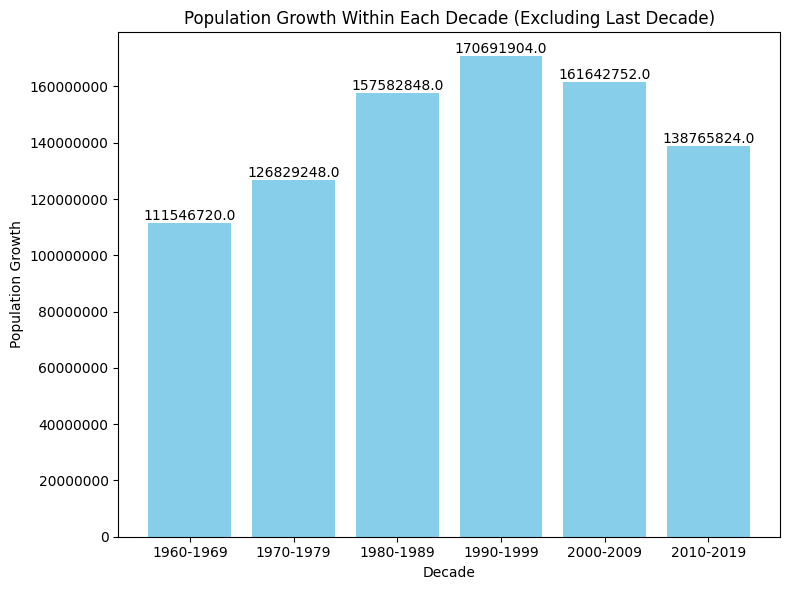

In [254]:
first_year_pop_of_decade = df.groupby('Decade')['Population, total'].first()
last_year_pop_of_decade = df.groupby('Decade')['Population, total'].last()

first_year_pop_of_decade = first_year_pop_of_decade.iloc[:-1]
last_year_pop_of_decade = last_year_pop_of_decade.iloc[:-1]

population_growth = last_year_pop_of_decade - first_year_pop_of_decade

plt.figure(figsize=(8, 6))
bars = plt.bar(population_growth.index, population_growth.values, color='skyblue')
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)

plt.title('Population Growth Within Each Decade (Excluding Last Decade)')
plt.xlabel('Decade')
plt.ylabel('Population Growth')
plt.xticks(population_growth.index)
plt.tight_layout()

for bar, val in zip(bars, population_growth.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), str(val), ha='center', va='bottom')

plt.show()


**Plotting Average GDP Growth over the decades**

In [262]:
gdp_growth = gdp.groupby('Decade')['GDP growth (annual %)'].mean()
gdp_growth = gdp_growth[:-1]

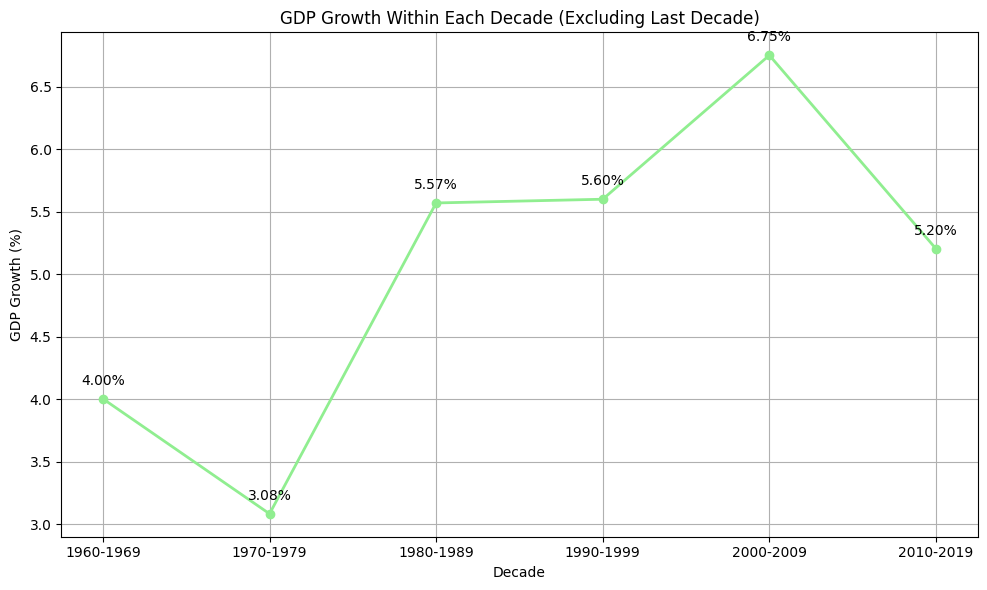

In [263]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

plt.plot(gdp_growth.index, gdp_growth.values, marker='o', linestyle='-', color='lightgreen', linewidth=2)

plt.title('GDP Growth Within Each Decade (Excluding Last Decade)')
plt.xlabel('Decade')
plt.ylabel('GDP Growth (%)')
plt.xticks(gdp_growth.index)
plt.grid(True)

for i, txt in enumerate(gdp_growth.values):
    plt.annotate(f'{txt:.2f}%', (gdp_growth.index[i], gdp_growth.values[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.tight_layout()
plt.show()


# Exploring the Dynamics of Agriculture and Industry with GDP Growth

The data indicates an inverse relationship between the roles of agriculture, forestry, and fishing, and industry (including construction) in GDP. When agriculture's contribution declines, industry's tends to rise, and vice versa. These shifts notably affect GDP growth; periods of decreasing agriculture and increasing industry typically coincide with GDP growth, while the opposite trend may slow it down. Over time, there's evidence of a transition from agrarian to industrial economies, aligning with economic development. This shift involves heightened industrial activity and a reduced emphasis on agriculture, marking a hallmark of economic progress.

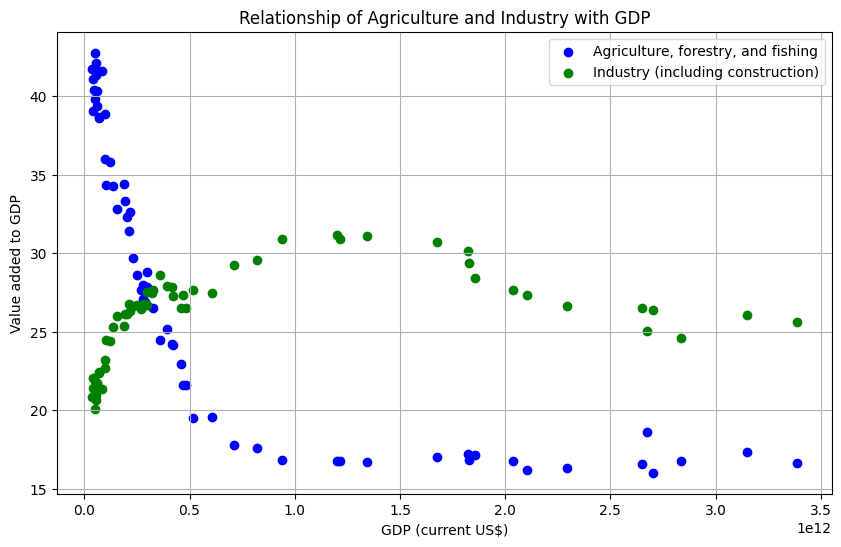

In [217]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.scatter(gdp['GDP (current US$)'], gdp['Agriculture, forestry, and fishing, value added (% of GDP)'],
            color='blue', label='Agriculture, forestry, and fishing')

plt.scatter(gdp['GDP (current US$)'], gdp['Industry (including construction), value added (% of GDP)'],
            color='green', label='Industry (including construction)')

plt.xlabel('GDP (current US$)')
plt.ylabel('Value added to GDP')
plt.title('Relationship of Agriculture and Industry with GDP')
plt.legend()
plt.grid(True)
plt.show()


# Analyzing GDP Factors: Key Contributors and Their Impact

1. Exports and Imports Lead the Pack: The strongest positive correlations with GDP are observed in the percentages of exports and imports of goods and services. This indicates that a higher volume of international trade positively impacts a country's GDP, suggesting a strong external economic engagement.

2. Tax Revenue and Merchandise Trade Follow: Following closely are tax revenue and merchandise trade as key contributors to GDP. This suggests that higher tax revenue, potentially reflective of a robust economy, and a greater share of merchandise trade relative to GDP, contribute positively to overall economic output.

3. Agriculture Shows a Negative Impact: Interestingly, agriculture, forestry, and fishing, which historically played a significant role in many economies, exhibit a negative correlation with GDP. A decline in the percentage contribution of these sectors to GDP is associated with higher overall economic performance. This suggests a shift away from agrarian-based economies towards more industrialized ones.

4. Industry's Contribution is Modest: Lastly, the percentage contribution of industry (including construction) to GDP exhibits a relatively modest positive correlation. While industry remains a significant contributor, its impact appears to be less pronounced compared to other factors like exports and imports.

In [218]:
import pandas as pd
import numpy as np

columns_of_interest = ['Agriculture, forestry, and fishing, value added (% of GDP)',
                      'Industry (including construction), value added (% of GDP)',
                      'Exports of goods and services (% of GDP)',
                      'Imports of goods and services (% of GDP)',
                      'Gross capital formation (% of GDP)',
                      'Revenue, excluding grants (% of GDP)',
                      'Tax revenue (% of GDP)',
                      'Military expenditure (% of GDP)',
                      'Merchandise trade (% of GDP)']

correlation_with_gdp = {}
for column in columns_of_interest:
    correlation = np.corrcoef(gdp['GDP (current US$)'], df[column])[0, 1]
    correlation_with_gdp[column] = correlation

ranked_factors = sorted(correlation_with_gdp.items(), key=lambda x: abs(x[1]), reverse=True)

print("Ranked Factors by Contribution to GDP:")
for i, (factor, correlation) in enumerate(ranked_factors):
    print(f"{i+1}. {factor}: {correlation:.2f}")


Ranked Factors by Contribution to GDP:
1. Exports of goods and services (% of GDP): 0.84
2. Imports of goods and services (% of GDP): 0.83
3. Tax revenue (% of GDP): 0.82
4. Merchandise trade (% of GDP): 0.81
5. Agriculture, forestry, and fishing, value added (% of GDP): -0.76
6. Gross capital formation (% of GDP): 0.65
7. Revenue, excluding grants (% of GDP): 0.60
8. Military expenditure (% of GDP): -0.53
9. Industry (including construction), value added (% of GDP): 0.39


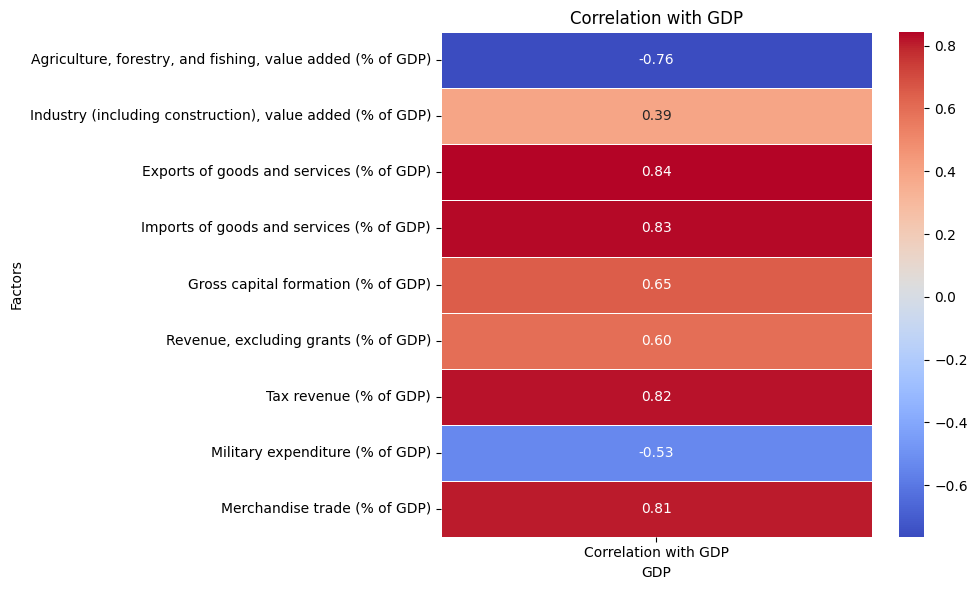

In [219]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

columns_of_interest = ['Agriculture, forestry, and fishing, value added (% of GDP)',
                      'Industry (including construction), value added (% of GDP)',
                      'Exports of goods and services (% of GDP)',
                      'Imports of goods and services (% of GDP)',
                      'Gross capital formation (% of GDP)',
                      'Revenue, excluding grants (% of GDP)',
                      'Tax revenue (% of GDP)',
                      'Military expenditure (% of GDP)',
                      'Merchandise trade (% of GDP)']

correlation_matrix = pd.DataFrame(index=columns_of_interest, columns=['Correlation with GDP'])
for column in columns_of_interest:
    correlation = np.corrcoef(gdp['GDP (current US$)'], df[column])[0, 1]
    correlation_matrix.loc[column, 'Correlation with GDP'] = correlation

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix.astype(float), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation with GDP')
plt.xlabel('GDP')
plt.ylabel('Factors')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()


In [220]:
print("Top 3 Factors Based on Correlation with GDP:")
for i, (factor, correlation) in enumerate(ranked_factors[:3]):
    print(f"{i+1}. {factor}: {correlation:.2f}")


Top 3 Factors Based on Correlation with GDP:
1. Exports of goods and services (% of GDP): 0.84
2. Imports of goods and services (% of GDP): 0.83
3. Tax revenue (% of GDP): 0.82


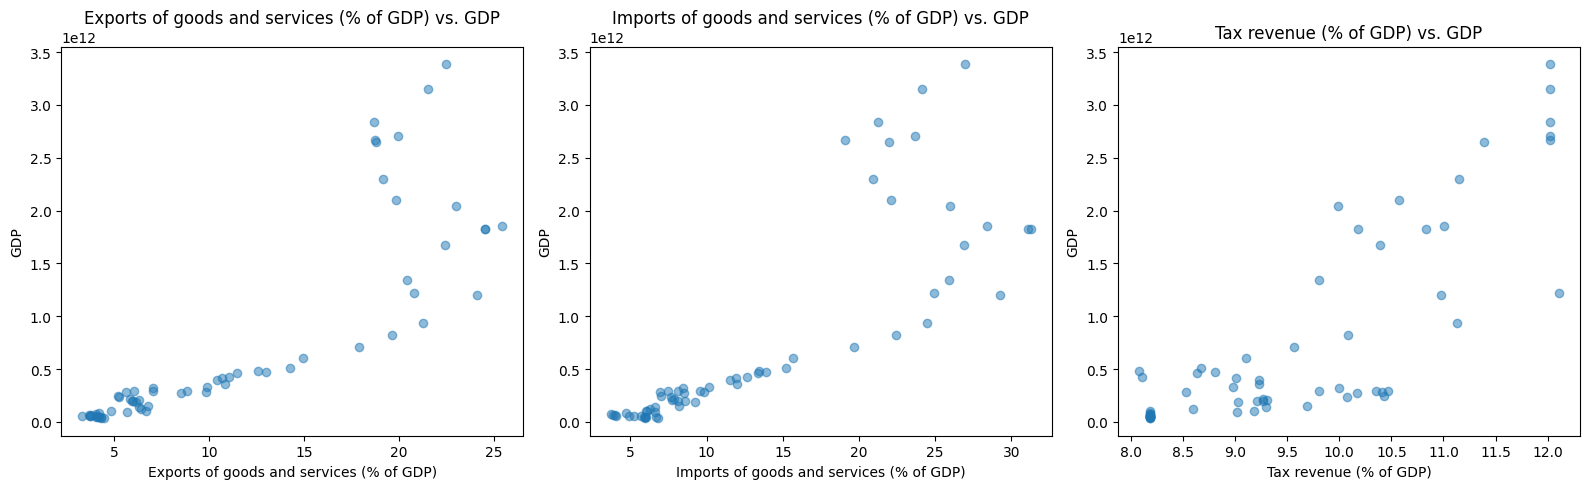

In [221]:
import matplotlib.pyplot as plt
top_factors = [factor for factor, _ in ranked_factors[:3]]
plt.figure(figsize=(16, 5))
for i, factor in enumerate(top_factors, 1):
    plt.subplot(1, 3, i)
    plt.scatter(df[factor], gdp['GDP (current US$)'], alpha=0.5)
    plt.title(factor + ' vs. GDP')
    plt.xlabel(factor)
    plt.ylabel('GDP')

plt.tight_layout()
plt.show()


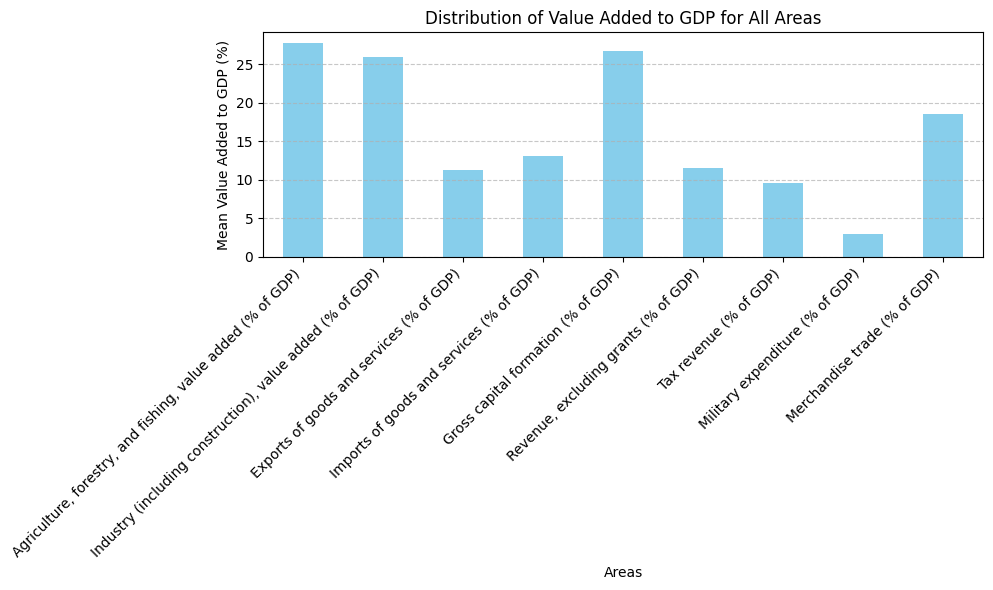

In [222]:
import matplotlib.pyplot as plt

percent_of_gdp_columns = [
    'Agriculture, forestry, and fishing, value added (% of GDP)',
    'Industry (including construction), value added (% of GDP)',
    'Exports of goods and services (% of GDP)',
    'Imports of goods and services (% of GDP)',
    'Gross capital formation (% of GDP)',
    'Revenue, excluding grants (% of GDP)',
    'Tax revenue (% of GDP)',
    'Military expenditure (% of GDP)',
    'Merchandise trade (% of GDP)'
]

aggregate_data = gdp[percent_of_gdp_columns].mean()

plt.figure(figsize=(10, 6))
aggregate_data.plot(kind='bar', color='skyblue')
plt.title('Distribution of Value Added to GDP for All Areas')
plt.xlabel('Areas')
plt.ylabel('Mean Value Added to GDP (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**Standardizing the Data**

In [223]:
from sklearn.preprocessing import StandardScaler
columns_to_exclude = ["GDP growth (annual %)"]
columns_to_standardize = [col for col in gdp.columns if col not in columns_to_exclude]

scaler = StandardScaler()
gdp_standardized = gdp.copy()
gdp_standardized[columns_to_standardize] = scaler.fit_transform(gdp_standardized[columns_to_standardize])
gdp=gdp_standardized.copy()
gdp

Series Name     Population, total  Urban population growth (annual %)  \
Decade    Year                                                          
1960-1969 1960             -1.518                              -0.158   
          1961             -1.484                              -0.158   
          1962             -1.449                               0.727   
          1963             -1.413                               0.712   
          1964             -1.376                               0.707   
          1965             -1.340                               0.551   
          1966             -1.304                               0.381   
          1967             -1.268                               0.334   
          1968             -1.231                               0.406   
          1969             -1.192                               0.466   
          1970             -1.152                               0.480   
1970-1979 1971             -1.110                               0.812   
          1972             -1.068                               1.806   
          1973             -1.025                               1.820   
          1974             -0.980                               1.840   
          1975             -0.935                               1.776   
          1976             -0.889                               1.701   
          1977             -0.842                               1.685   
          1978             -0.794                               1.679   
          1979             -0.745                               1.686   
          1980             -0.694                               1.757   
1980-1989 1981             -0.641                               1.361   
          1982             -0.587                               0.523   
          1983             -0.533                               0.517   
          1984             -0.477                               0.523   
          1985             -0.420                               0.482   
          1986             -0.362                               0.453   
          1987             -0.303                               0.393   
          1988             -0.244                               0.335   
          1989             -0.184                               0.302   
          1990             -0.123                               0.226   
1990-1999 1991             -0.062                               0.040   
          1992             -0.001                              -0.230   
          1993              0.061                              -0.289   
          1994              0.123                              -0.350   
          1995              0.185                              -0.422   
          1996              0.248                              -0.502   
          1997              0.310                              -0.573   
          1998              0.373                              -0.642   
          1999              0.436                              -0.726   
          2000              0.499                              -0.786   
2000-2009 2001              0.562                              -0.555   
          2002              0.626                              -0.092   
          2003              0.688                              -0.212   
          2004              0.750                              -0.324   
          2005              0.811                              -0.484   
          2006              0.869                              -0.660   
          2007              0.926                              -0.784   
          2008              0.982                              -0.880   
          2009              1.037                              -0.963   
          2010              1.093                              -1.003   
2010-2019 2011              1.149                              -1.041   
          2012              1.205                         

**Categorizing Annual GDP**

In [224]:
def categorize_gdp(gdp_value, cutoffs):
    if gdp_value <= cutoffs[0]:
        return 'Very Low GDP'
    elif gdp_value <= cutoffs[1]:
        return 'Low GDP'
    elif gdp_value <= cutoffs[2]:
        return 'Average GDP'
    elif gdp_value <= cutoffs[3]:
        return 'High GDP'
    else:
        return 'Very High GDP'

percentiles = np.percentile(df['GDP (current US$)'], [20, 40, 60, 80])
cutoffs = [percentiles[0], percentiles[1], percentiles[2], percentiles[3]]

gdp['GDP Category'] = df['GDP (current US$)'].apply(lambda x: categorize_gdp(x, cutoffs))
gdp

Series Name     Population, total  Urban population growth (annual %)  \
Decade    Year                                                          
1960-1969 1960             -1.518                              -0.158   
          1961             -1.484                              -0.158   
          1962             -1.449                               0.727   
          1963             -1.413                               0.712   
          1964             -1.376                               0.707   
          1965             -1.340                               0.551   
          1966             -1.304                               0.381   
          1967             -1.268                               0.334   
          1968             -1.231                               0.406   
          1969             -1.192                               0.466   
          1970             -1.152                               0.480   
1970-1979 1971             -1.110                               0.812   
          1972             -1.068                               1.806   
          1973             -1.025                               1.820   
          1974             -0.980                               1.840   
          1975             -0.935                               1.776   
          1976             -0.889                               1.701   
          1977             -0.842                               1.685   
          1978             -0.794                               1.679   
          1979             -0.745                               1.686   
          1980             -0.694                               1.757   
1980-1989 1981             -0.641                               1.361   
          1982             -0.587                               0.523   
          1983             -0.533                               0.517   
          1984             -0.477                               0.523   
          1985             -0.420                               0.482   
          1986             -0.362                               0.453   
          1987             -0.303                               0.393   
          1988             -0.244                               0.335   
          1989             -0.184                               0.302   
          1990             -0.123                               0.226   
1990-1999 1991             -0.062                               0.040   
          1992             -0.001                              -0.230   
          1993              0.061                              -0.289   
          1994              0.123                              -0.350   
          1995              0.185                              -0.422   
          1996              0.248                              -0.502   
          1997              0.310                              -0.573   
          1998              0.373                              -0.642   
          1999              0.436                              -0.726   
          2000              0.499                              -0.786   
2000-2009 2001              0.562                              -0.555   
          2002              0.626                              -0.092   
          2003              0.688                              -0.212   
          2004              0.750                              -0.324   
          2005              0.811                              -0.484   
          2006              0.869                              -0.660   
          2007              0.926                              -0.784   
          2008              0.982                              -0.880   
          2009              1.037                              -0.963   
          2010              1.093                              -1.003   
2010-2019 2011              1.149                              -1.041   
          2012              1.205                         

In [225]:
features=['Population, total',
 'Urban population growth (annual %)',
 'Agriculture, forestry, and fishing, value added (% of GDP)',
 'Industry (including construction), value added (% of GDP)',
 'Exports of goods and services (% of GDP)',
 'Imports of goods and services (% of GDP)',
 'Gross capital formation (% of GDP)',
 'Revenue, excluding grants (% of GDP)',
 'Tax revenue (% of GDP)',
 'Military expenditure (% of GDP)',
 'Merchandise trade (% of GDP)',
 'External debt stocks, total (DOD, current US$)',
 'Net barter terms of trade index (2015 = 100)',
 'Foreign direct investment, net inflows (BoP, current US$)']

# Training and Predicting the GDP Category Using Three Different Classification Models

In this section, we aim to train our dataset using three distinct models: Decision Tree, Naive Bayes, and K-Nearest Neighbors (KNN). Following the training phase, we will utilize these models to make predictions. Subsequently, we'll assess the accuracy of each model to determine which one performed most effectively in predicting the target variable. This comparative analysis will provide insights into the suitability and performance of each model for our dataset.

In [226]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

#DECISION TREE
random_years = gdp.index.get_level_values(1).unique().to_series().sample(n=10, random_state=42)

train_data = gdp.loc[~gdp.index.get_level_values(1).isin(random_years)]
prediction_data = gdp.loc[gdp.index.get_level_values(1).isin(random_years)]

label_encoder = LabelEncoder()
train_data['GDP Category'] = label_encoder.fit_transform(train_data['GDP Category'])

# Training data
X_train = train_data[features]
y_train = train_data['GDP Category']
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Prediction data
X_prediction = prediction_data[features]
predicted_growth_category = clf.predict(X_prediction)

predicted_growth_category = label_encoder.inverse_transform(predicted_growth_category)
prediction_data['Predicted GDP Category'] = predicted_growth_category

prediction_data[["GDP Category", "Predicted GDP Category"]]


C:\Users\pvpra\AppData\Local\Temp\ipykernel_22308\730121873.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['GDP Category'] = label_encoder.fit_transform(train_data['GDP Category'])
C:\Users\pvpra\AppData\Local\Temp\ipykernel_22308\730121873.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prediction_data['Predicted GDP Category'] = predicted_growth_category


Series Name      GDP Category Predicted GDP Category
Decade    Year                                      
1960-1969 1960   Very Low GDP           Very Low GDP
          1965   Very Low GDP           Very Low GDP
1970-1979 1972   Very Low GDP           Very Low GDP
          1976        Low GDP                Low GDP
1980-1989 1985    Average GDP            Average GDP
1990-1999 1996    Average GDP            Average GDP
2000-2009 2003       High GDP               High GDP
2010-2019 2017  Very High GDP          Very High GDP
          2020  Very High GDP          Very High GDP
2020-2022 2021  Very High GDP          Very High GDP

In [227]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

y_true = label_encoder.transform(prediction_data['GDP Category'])
y_pred = label_encoder.transform(prediction_data['Predicted GDP Category'])

print("Metrics for Decision Tree Model:")
# Accuracy
accuracy_dt = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy_dt)

# Precision
precision = precision_score(y_true, y_pred, average='weighted')
print("Precision:", precision)

# Recall
recall = recall_score(y_true, y_pred, average='weighted')
print("Recall:", recall)

# F1 score
f1 = f1_score(y_true, y_pred, average='weighted')
print("F1 Score:", f1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
y_test_dt=y_true
y_pred_dt=y_pred
print("Confusion Matrix:")
print(conf_matrix)


Metrics for Decision Tree Model:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[2 0 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [0 0 0 3 0]
 [0 0 0 0 3]]


In [228]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split 

target_variable = 'GDP Category'
X = gdp[features].values
y = gdp[target_variable].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

y_pred = nb_classifier.predict(X_test)

predictions_df = pd.DataFrame({'Actual Growth Category': y_test, 'Predicted Growth Category': y_pred})
print("\nActual Test Set along with Predictions:")
predictions_df



Actual Test Set along with Predictions:


,Actual Growth Category,Predicted Growth Category
0,Very High GDP,Very High GDP
1,Very High GDP,Very High GDP
2,Very Low GDP,Very Low GDP
3,High GDP,High GDP
4,Very Low GDP,Very Low GDP
5,Average GDP,Average GDP
6,Low GDP,Low GDP
7,Very Low GDP,Low GDP
8,Average GDP,Average GDP
9,Very High GDP,Very High GDP


In [229]:
print("Metrics for Naive Bayes:")
accuracy_nb = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
y_test_nb=y_test
y_pred_nb=y_pred
print("Accuracy:", accuracy_nb)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

Metrics for Naive Bayes:
Accuracy: 0.9230769230769231
Precision: 0.9615384615384616
Recall: 0.9230769230769231
F1 Score: 0.9304029304029305
Confusion Matrix:
[[2 0 0 0 0]
 [0 2 0 0 0]
 [0 0 1 0 0]
 [0 0 0 4 0]
 [0 0 1 0 3]]


In [230]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

target_variable = 'GDP Category'
X = gdp[features].values
y = gdp[target_variable].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)

predictions_df_knn = pd.DataFrame({'Actual Growth Category': y_test, 'Predicted Growth Category': y_pred_knn})
print("\nActual Test Set along with Predictions (KNN):")
predictions_df_knn



Actual Test Set along with Predictions (KNN):


,Actual Growth Category,Predicted Growth Category
0,Very High GDP,Very High GDP
1,Very High GDP,Very High GDP
2,Very Low GDP,Very Low GDP
3,High GDP,High GDP
4,Very Low GDP,Very Low GDP
5,Average GDP,Average GDP
6,Low GDP,Low GDP
7,Very Low GDP,Very Low GDP
8,Average GDP,Average GDP
9,Very High GDP,Very High GDP


In [231]:
print("Metrics for Knn Model:")
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

print("Accuracy of KNN Classifier:", accuracy_knn)
print("Precision of KNN Classifier:", precision_knn)
print("Recall of KNN Classifier:", recall_knn)
print("F1 Score of KNN Classifier:", f1_knn)
print("Confusion Matrix of KNN Classifier:")
print(conf_matrix_knn)

Metrics for Knn Model:
Accuracy of KNN Classifier: 1.0
Precision of KNN Classifier: 1.0
Recall of KNN Classifier: 1.0
F1 Score of KNN Classifier: 1.0
Confusion Matrix of KNN Classifier:
[[2 0 0 0 0]
 [0 2 0 0 0]
 [0 0 1 0 0]
 [0 0 0 4 0]
 [0 0 0 0 4]]


# Comparing Classification Models Performance: Accuracy and Confusion Matrix Analysis

The results indicate varying levels of accuracy across the three classifiers. While the KNN classifier achieved the highest accuracy, followed closely by the Naive Bayes classifier, the Decision Tree classifier lagged slightly behind.

Despite conducting multiple tests, the KNN classifier consistently yielded a perfect accuracy score of 1.0, indicating robust performance across different iterations. In contrast, the accuracy scores of the Decision Tree and Naive Bayes classifiers varied with each test, suggesting that their performance may be influenced by factors such as dataset composition or random initialization. 

Accuracy of Decision Tree Classifier: 1.0
Accuracy of KNN Classifier: 1.0
Accuracy of Naive Bayes Classifier: 0.9230769230769231


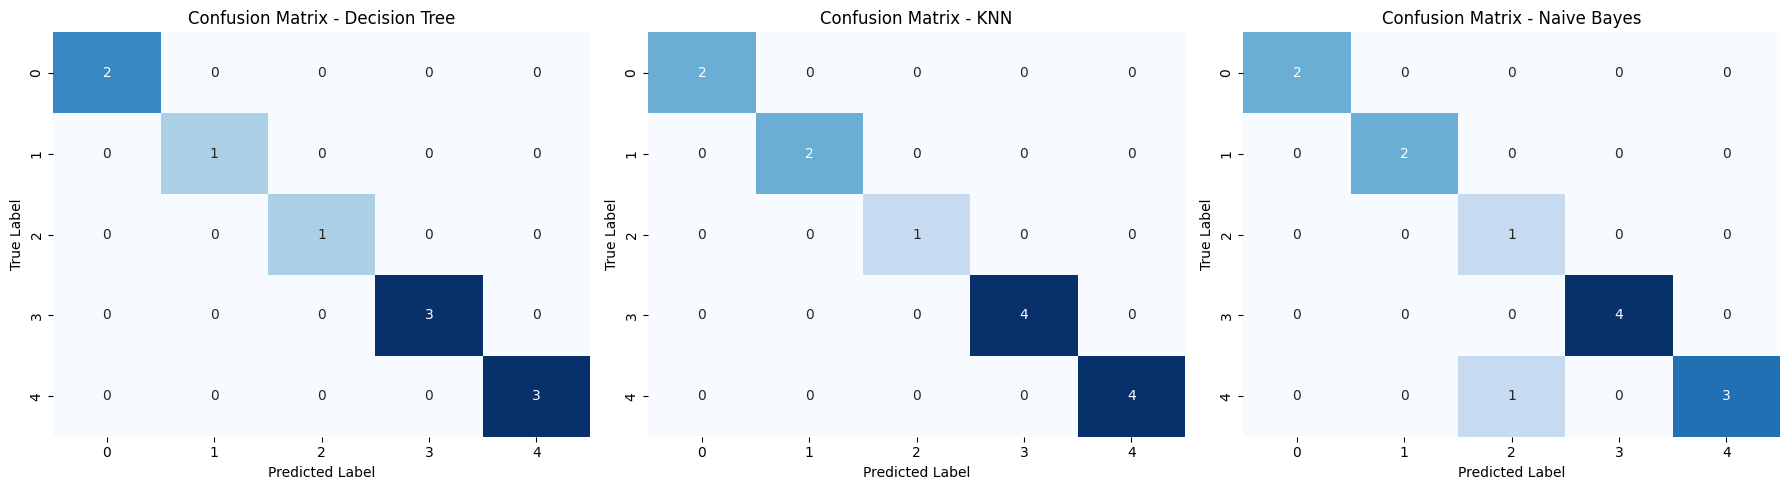

In [232]:
print("Accuracy of Decision Tree Classifier:", accuracy_dt)
print("Accuracy of KNN Classifier:", accuracy_knn)
print("Accuracy of Naive Bayes Classifier:", accuracy_nb)

# Plotting the confusion matrices
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
cm_dt = confusion_matrix(y_test_dt, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.subplot(1, 3, 2)
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.subplot(1, 3, 3)
cm_nb = confusion_matrix(y_test_nb, y_pred_nb)
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout()
plt.show()

# Exploring Annual GDP Prediction using Linear Regression

The predicted values from our linear regression model closely approximate the actual values in the testing dataset. Overall, the model seems to be performing well in capturing the underlying relationships between the features and the target variable. However, there are some discrepancies between predicted and actual values, as evidenced by the differences observed in certain instances. These differences may be attributed to factors such as noise in the data, unaccounted variables, or limitations in the model's capacity to capture complex relationships. Nonetheless, the model's ability to closely approximate the actual values suggests that it is providing reasonably accurate predictions.

Based on this model's predictions, we can infer that it demonstrates a strong capability to estimate future GDP values based on the value added by different sectors to GDP. The close correspondence between the predicted and actual values indicates that the model effectively captures the relationships between various economic indicators and GDP. Therefore, it can serve as a valuable tool for forecasting GDP trends and informing strategic decision-making in economic planning, investment, and policymaking contexts. However, it's essential to acknowledge that while the model provides reliable predictions in this context, its performance may vary in different scenarios or when faced with unforeseen economic factors. 

In [233]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

target_variable = 'GDP (current US$)'

features = ['Population, total', 'Urban population growth (annual %)',
       'Agriculture, forestry, and fishing, value added (% of GDP)',
       'Industry (including construction), value added (% of GDP)',
       'Exports of goods and services (% of GDP)',
       'Imports of goods and services (% of GDP)',
       'Gross capital formation (% of GDP)',
       'Revenue, excluding grants (% of GDP)', 'Tax revenue (% of GDP)',
       'Military expenditure (% of GDP)', 'Merchandise trade (% of GDP)',
       'External debt stocks, total (DOD, current US$)',
       'Net barter terms of trade index (2015 = 100)',
       'Foreign direct investment, net inflows (BoP, current US$)']

X = gdp[features].values
y = gdp[target_variable].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Mean Squared Error: 0.015769181425458613
Coefficients: [ 1.68358060e-01 -1.79044521e-04  8.89534162e-02 -3.09445490e-02
 -4.86668652e-02  7.30301160e-01 -8.21351363e-02  8.01726540e-02
 -2.55749471e-02  1.02170265e-03 -5.81409954e-01  8.01961463e-01
 -5.16552873e-02  1.11612348e-01]
Intercept: 0.008337542190821084


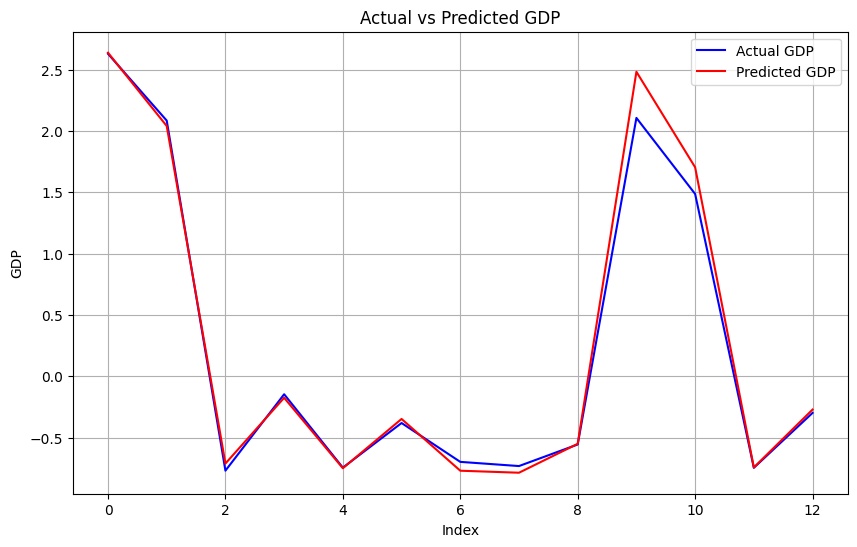

In [234]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test, color='blue', label='Actual GDP')
plt.plot(y_pred, color='red', label='Predicted GDP')

plt.xlabel('Index')
plt.ylabel('GDP')
plt.title('Actual vs Predicted GDP')
plt.legend()
plt.grid(True)
plt.show()
